# Life Expectancy and GDP Project

## Project Goals
This project analyzes the relationship bewteen the GDP and life expectancy of six countries.

## Data Acquisition
We obtains the data on GDP and lifexpectancy from 2000 to 2015 across 7 countries (Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe') from the World Health Organization and the World Bank.

In [1]:
import pandas as pd


data_csv = pd.read_csv('all_data.csv')
print(data_csv.head())

years = [str(int(i))[2:] for i in data_csv.Year.unique()]
print(years)

countries = data_csv.Country.unique()
print(countries)


  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15']
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


## Data Visualization 


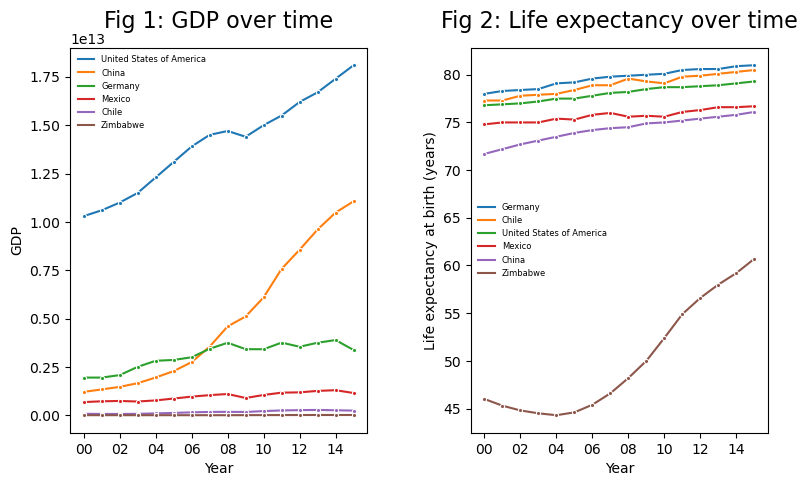

<Figure size 640x480 with 0 Axes>

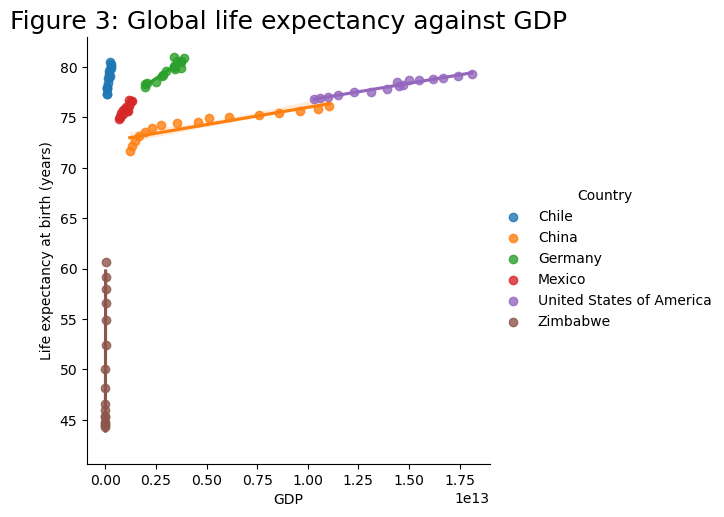

<Figure size 640x480 with 0 Axes>

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr


# plot GDP and Life expectancy across countries over time

plt.figure(figsize=(9,5))
#GDP_lines = plt.subplot(2,1,1)
#sns.lineplot(x='GDP',y='Life expectancy at birth (years)', data=data_csv,hue='Country')

years_label = [years[i] for i in range(0,16,2)]
hue_order_GDP = data_csv.groupby('Country')['GDP'].mean().sort_values(ascending=False).index

GDP_lines = plt.subplot(1,2,1)
sns.lineplot(y='GDP',x='Year', data=data_csv, hue='Country',hue_order=hue_order_GDP,marker='o',markersize=3)
GDP_lines.set_xticks(range(2000,2016,2))
GDP_lines.set_xticklabels(years_label)
plt.legend(loc=2, fontsize=6,frameon=False)
plt.title('Fig 1: GDP over time', y=1.03, fontsize =16)

hue_order_life_expectancy = data_csv.groupby('Country')['Life expectancy at birth (years)'].mean().sort_values(ascending=False).index
Life_expectancy_lines = plt.subplot(1,2,2)
sns.lineplot(y='Life expectancy at birth (years)',x='Year', data=data_csv, hue='Country',hue_order=hue_order_life_expectancy,marker='o',markersize=3)
Life_expectancy_lines.set_xticks(range(2000,2016,2))
Life_expectancy_lines.set_xticklabels(years_label)
plt.legend(fontsize=6,frameon=False)
plt.title('Fig 2: Life expectancy over time', y = 1.03, fontsize =16)

plt.subplots_adjust(wspace=0.35, hspace=0.4)

plt.show()
plt.clf()

sns.lmplot(x='GDP',y='Life expectancy at birth (years)', data=data_csv,hue='Country')
plt.title("Figure 3: Global life expectancy against GDP", fontsize=18, y=1)
plt.show()
plt.clf()

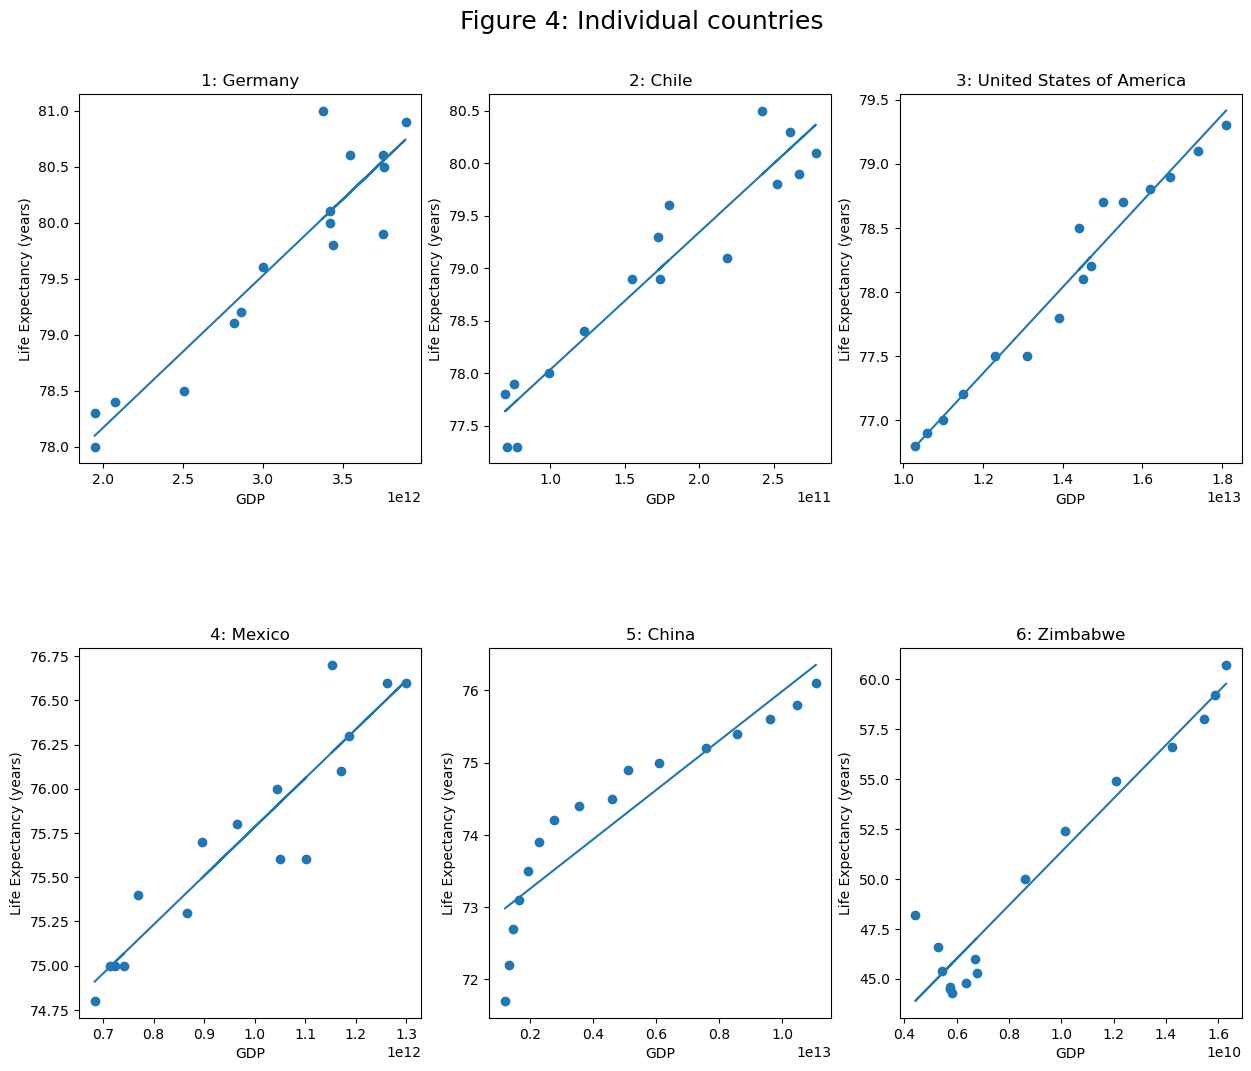

<Figure size 640x480 with 0 Axes>

In [4]:
# plot life expectency against GDP for each countries


plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Figure 4: Individual countries", fontsize=18, y=0.95)

for n, country in enumerate(hue_order_life_expectancy):
    # add a new subplot iteratively
    ax = plt.subplot(2, 3, n +1)
    data = data_csv[data_csv.Country == country]
    plt.scatter(x='GDP', y= 'Life expectancy at birth (years)', data = data_csv[data_csv.Country == country])
    a, b = np.polyfit(data.GDP,data['Life expectancy at birth (years)'],1)
    plt.plot(data.GDP,a*data.GDP+b)
    plt.title(f'{n+1}: {country}')
    plt.xlabel('GDP')
    plt.ylabel('Life Expectancy (years)')
plt.show()
plt.clf()


## Data Summary and Hypothesis Testing


### For individual countries
- correlation between the life expectancy and GDP

    - According the the data visualization, for each country, those two variables seem to be positively correlated. So we calucate the correlation to evaluate the linear relationship.

In [5]:
relationship_ans = {'Country':[],'Correlation':[],'P_value':[], 'GDP mean':[], 'Life expectancy mean':[], 'Linear slope':[]}

for country in data_csv.groupby('Country')['Life expectancy at birth (years)'].mean().sort_values(ascending=False).index:
    data = data_csv[data_csv.Country == country]
    r, P_value = pearsonr(data['GDP'],data['Life expectancy at birth (years)'])
    a, b = np.polyfit(data.GDP,data['Life expectancy at birth (years)'],1)
    relationship_ans['Country'].append(country)
    relationship_ans['Correlation'].append(r)
    relationship_ans['P_value'].append(P_value)
    relationship_ans['GDP mean'].append(np.mean(data.GDP))
    relationship_ans['Life expectancy mean'].append(np.mean(data['Life expectancy at birth (years)']))
    relationship_ans['Linear slope'].append(a)

relationship_table = pd.DataFrame(relationship_ans)

print(relationship_table)

                    Country  Correlation       P_value      GDP mean  \
0                   Germany     0.932699  1.401882e-07  3.094776e+12   
1                     Chile     0.949877  1.865914e-08  1.697888e+11   
2  United States of America     0.981709  1.749971e-11  1.407500e+13   
3                    Mexico     0.932238  1.468696e-07  9.766506e+11   
4                     China     0.908526  1.125099e-06  4.957714e+12   
5                  Zimbabwe     0.966200  1.235852e-09  9.062580e+09   

   Life expectancy mean  Linear slope  
0              79.65625  1.362397e-12  
1              78.94375  1.308337e-11  
2              78.06250  3.359806e-13  
3              75.71875  2.762337e-12  
4              74.26250  3.420219e-13  
5              50.09375  1.335299e-09  


- Hypothesis test for each country
    - Since P-values calculated are all much lower than 1%, we have 99% confidence to conclude that life expectancy is positively correlated with GDP accross countries, overall over 0.9.

## Comparing countries
- Linear slops with different GDP levels

According to Figure 2, when plotting data from different countries together, it shows that life expectancy improves at a diminished rate with higher GDP. Let's compare the linear slopes among countries of various GDP level. 

In [6]:
linear_slope_rank = pd.DataFrame(relationship_ans).sort_values(by='Linear slope', ascending=False)
print(linear_slope_rank)

                    Country  Correlation       P_value      GDP mean  \
5                  Zimbabwe     0.966200  1.235852e-09  9.062580e+09   
1                     Chile     0.949877  1.865914e-08  1.697888e+11   
3                    Mexico     0.932238  1.468696e-07  9.766506e+11   
0                   Germany     0.932699  1.401882e-07  3.094776e+12   
4                     China     0.908526  1.125099e-06  4.957714e+12   
2  United States of America     0.981709  1.749971e-11  1.407500e+13   

   Life expectancy mean  Linear slope  
5              50.09375  1.335299e-09  
1              78.94375  1.308337e-11  
3              75.71875  2.762337e-12  
0              79.65625  1.362397e-12  
4              74.26250  3.420219e-13  
2              78.06250  3.359806e-13  


As demonstrated by the table above, while life expectancy is prolonged with higher GDP, the growth rate becomes slower as GDP up to higher levels. For example, GDP has the greatest positive effect on the life expactency of Zimbabwe (with the lowest GDP and highest slpe), while the GDP has the smallest effect in the United States. 